In [1]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import h5py
f_test_raw = h5py.File('Data/test.h5','r')
y_test = f_test_raw['all_events']['y'][:]
weights_test = f_test_raw['all_events']['weight'][:]
passSR_test = f_test_raw['all_events']['passSR'][:]

In [3]:
import numpy as np
y_pred_opu_shifted = np.load("Results/SHIFTED_OPU_FINAL_THESIS_RESULT_16000_Features_3BITS4BINS_SHIFTED_LOGofWEIGHT_SMALL-TESTSET.npy")
y_pred_opu = np.load("Results/OPU_FINAL_THESIS_RESULT_16000_Features_3BITS4BINS_LOGofWEIGHT_SMALL-TESTSET.npy")

In [4]:
from sklearn import metrics
fpr_opu_shifted, tpr_opu_shifted, thresholds = metrics.roc_curve(y_test,y_pred_opu_shifted,sample_weight=weights_test)
metrics.auc(fpr_opu_shifted, tpr_opu_shifted)

0.9628877146474673

In [37]:
fpr_opu_shifted_not_weighted, tpr_opu_shifted_not_weighted, thresholds = metrics.roc_curve(y_test,y_pred_opu_shifted)
metrics.auc(fpr_opu_shifted_not_weighted, tpr_opu_shifted_not_weighted)

0.9570017762222403

In [38]:
fpr_opu, tpr_opu, thresholds = metrics.roc_curve(y_test,y_pred_opu,sample_weight=weights_test)
metrics.auc(fpr_opu, tpr_opu)

0.9636071469298234

In [39]:
fpr_opu_not_weighted, tpr_opu_not_weighted, thresholds = metrics.roc_curve(y_test,y_pred_opu)
metrics.auc(fpr_opu_not_weighted, tpr_opu_not_weighted)

0.9373008558167206

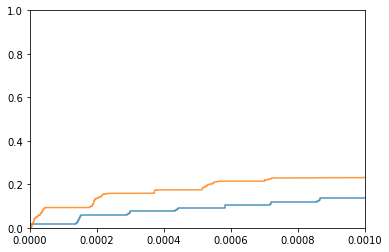

In [40]:
plt.axis((0,.001,0,1))
plt.plot(fpr_bdt,tpr_bdt,alpha=.8,)
plt.plot(fpr_opu,tpr_opu,alpha=.8,)

In [41]:
x_dot = np.sum(weights_test[(passSR_test == 1) & (y_test == 0)]) / np.sum(weights_test[y_test==0])
y_dot = np.sum(weights_test[(passSR_test == 1) & (y_test == 1)]) / np.sum(weights_test[y_test==1])

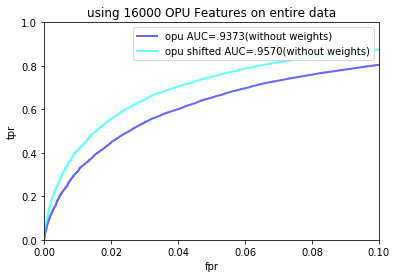

In [56]:
#plt.scatter(x_dot, y_dot,label="Physics selection")
#plt.plot(fpr_opu, tpr_opu, lw=2,alpha=.6,label="opu AUC = .9636",color='red')
plt.plot(fpr_opu_not_weighted, tpr_opu_not_weighted, lw=2,alpha=.6,label="opu AUC=.9373(without weights)",color='blue')
#plt.plot(fpr_opu_shifted, tpr_opu_shifted, lw=2,alpha=.6,label="opu shifted AUC=.9629",color='green')
plt.plot(fpr_opu_shifted_not_weighted, tpr_opu_shifted_not_weighted, lw=2,alpha=.6,label="opu shifted AUC=.9570(without weights)",color='cyan')
plt.axis((0,.1,0,1))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("using 16000 OPU Features on entire data")
plt.legend(loc='upper right')
#plt.savefig("Effect_of_shifting_image")

In [47]:
y_pred_bdt = np.load("Results/Thesis_Final_BDT_on_Pixels.npy")

In [48]:
fpr_bdt, tpr_bdt, thresholds = metrics.roc_curve(y_test,y_pred_bdt,sample_weight=weights_test)
metrics.auc(fpr_bdt, tpr_bdt)

0.9546534868771432

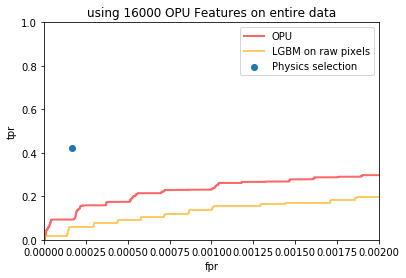

In [49]:
plt.scatter(x_dot, y_dot,label="Physics selection")
plt.plot(fpr_opu, tpr_opu, lw=2,alpha=.6,label="OPU",color='red')
plt.plot(fpr_bdt, tpr_bdt, lw=2,alpha=.6,label="LGBM on raw pixels",color='orange')
plt.axis((0,.002,0,1))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("using 16000 OPU Features on entire data")
plt.legend(loc='upper right')
#plt.savefig("Results/FINAL_OPURESULT_PLOT_OPUOnImages_final_thesis_result_16000_feaures_zoomed")

In [50]:
y_pred_linear_on_raw = np.load("Results/FINAL_Thesis_result_linear_classifier_on_raw_data_result.npy")

In [51]:
fpr_linear_on_raw, tpr_linear_on_raw, thresholds = metrics.roc_curve(y_test,y_pred_linear_on_raw)
metrics.auc(fpr_linear_on_raw, tpr_linear_on_raw)

0.8087365300386178

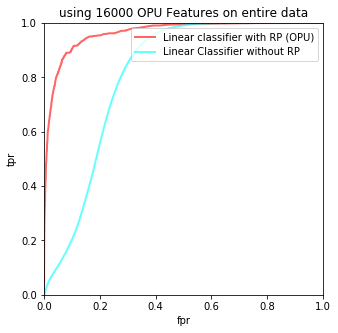

In [58]:
#plt.scatter(x_dot, y_dot,label="Physics selection")
plt.figure(figsize=(5,5))
plt.plot(fpr_opu, tpr_opu, lw=2,alpha=.6,label="Linear classifier with RP (OPU)",color='red')
plt.plot(fpr_linear_on_raw, tpr_linear_on_raw, lw=2,alpha=.6,label="Linear Classifier without RP",color='cyan')
plt.axis((0,1,0,1))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("using 16000 OPU Features on entire data")
plt.legend(loc='upper right')
plt.savefig("OPU vs linear")

In [ ]:
y_pred_jet_vars_23 = np.load("Results/Final_LGBM_all_trainingdata_testresults.npy")

In [ ]:
fpr_jet_vars_23, tpr_jet_vars_23, thresholds = metrics.roc_curve(y_test,y_pred_jet_vars_23,sample_weight=weights_test)
metrics.auc(fpr_jet_vars_23, tpr_jet_vars_23)

In [ ]:
y_pred_jet_vars_24 = np.load("Results/Final_LGBM_24v_all_trainingdata_testresults.npy")

In [ ]:
fpr_jet_vars_24, tpr_jet_vars_24, thresholds = metrics.roc_curve(y_test,y_pred_jet_vars_24,sample_weight=weights_test)
metrics.auc(fpr_jet_vars_24, tpr_jet_vars_24)

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,8))
plt.scatter(x_dot, y_dot,label="Physics selection")
plt.plot(fpr_opu, tpr_opu, lw=2,alpha=.6,label="OPU")
plt.plot(fpr_bdt, tpr_bdt, lw=2,alpha=.6,label="LGBM on raw pixels")
plt.plot(fpr_jet_vars_23, tpr_jet_vars_23, lw=2,alpha=.6,label="LGBM on jet vars")
plt.plot(fpr_jet_vars_24, tpr_jet_vars_24, lw=2,alpha=.6,label="LGBM on jet vars + OPU")
plt.xlim(0, 0.0004)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.ylim(0, 1)
plt.title("using 16000 OPU Features")
plt.legend(loc='upper right')
#plt.savefig("Results/FINAL_OPURESULT_PLOT_OPUOnImages_final_thesis_result_16000_feaures_zoomed_out")